<a href="https://colab.research.google.com/github/DevNandini02/CodeClauseInternship_Market_Basket_Analysis/blob/main/market_basket_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
#Import necessary libraries
import pandas as pd
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
#Upload Dataset
data = pd.read_csv('/content/drive/MyDrive/Groceries_data.csv')
display(data.head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,2015-07-21,tropical fruit,2015,7,21,1
1,2552,2015-05-01,whole milk,2015,5,1,4
2,2300,2015-09-19,pip fruit,2015,9,19,5
3,1187,2015-12-12,other vegetables,2015,12,12,5
4,3037,2015-01-02,whole milk,2015,1,2,4


In [3]:
# Convert the dataset into a list of lists
transactions = []
for i in range(len(data)):
    transaction = [str(item) for item in data.iloc[i].tolist() if item != '']
    transactions.append(transaction)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
# Create a DataFrame with the transactions
df = pd.DataFrame(transactions)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
# Use one-hot encoding to convert the data into a format suitable for Apriori
oht = df.applymap(lambda x: 1 if x != '' else 0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
# Use the Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(oht, min_support=0.02, use_colnames=True)
frequent_itemsets.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,1.0,(0)
1,1.0,(1)
2,1.0,(2)
3,1.0,(3)
4,1.0,(4)


In [10]:
#Find association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
rules.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(0),(1),1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0
1,(1),(0),1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0
2,(0),(2),1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0
3,(2),(0),1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0
4,(0),(3),1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0


In [11]:
# Display the frequent itemsets and association rules
print("Frequent Itemsets:")
print(frequent_itemsets)

Frequent Itemsets:
     support               itemsets
0        1.0                    (0)
1        1.0                    (1)
2        1.0                    (2)
3        1.0                    (3)
4        1.0                    (4)
..       ...                    ...
122      1.0     (0, 1, 2, 4, 5, 6)
123      1.0     (0, 1, 3, 4, 5, 6)
124      1.0     (0, 2, 3, 4, 5, 6)
125      1.0     (1, 2, 3, 4, 5, 6)
126      1.0  (0, 1, 2, 3, 4, 5, 6)

[127 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
print("\nAssociation Rules:")
print(rules)


Association Rules:
     antecedents         consequents  antecedent support  consequent support  \
0            (0)                 (1)                 1.0                 1.0   
1            (1)                 (0)                 1.0                 1.0   
2            (0)                 (2)                 1.0                 1.0   
3            (2)                 (0)                 1.0                 1.0   
4            (0)                 (3)                 1.0                 1.0   
...          ...                 ...                 ...                 ...   
1927         (2)  (0, 1, 3, 4, 5, 6)                 1.0                 1.0   
1928         (3)  (0, 1, 2, 4, 5, 6)                 1.0                 1.0   
1929         (4)  (0, 1, 2, 3, 5, 6)                 1.0                 1.0   
1930         (5)  (0, 1, 2, 3, 4, 6)                 1.0                 1.0   
1931         (6)  (0, 1, 2, 3, 4, 5)                 1.0                 1.0   

      support  conf

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


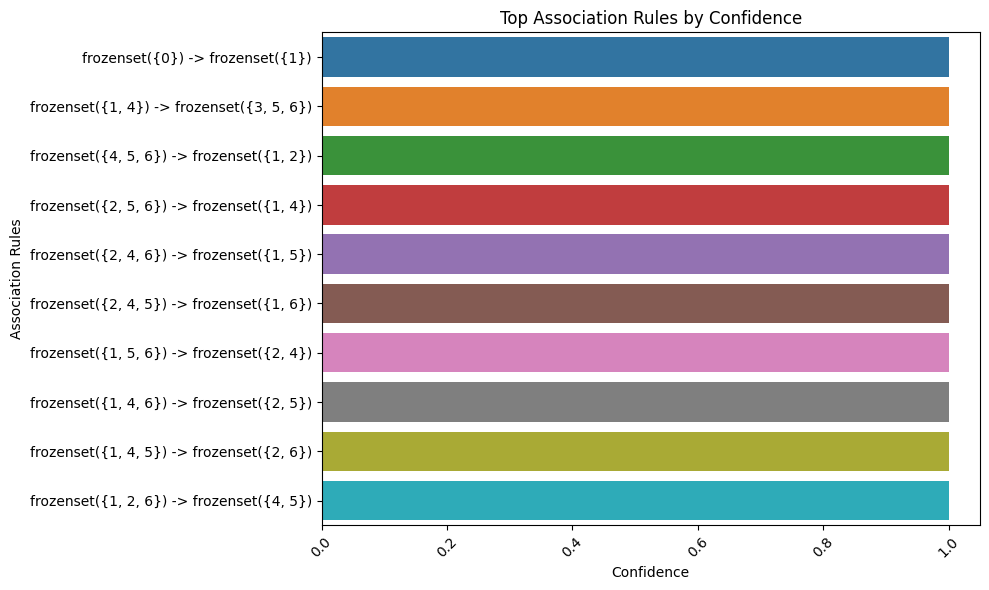

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

#Sorting by confidence and selecting the top 10 rules
top_rules = rules.sort_values(by='confidence', ascending=False).head(10)

#Visualize the top rules by confidence
plt.figure(figsize=(10, 6))
sns.barplot(x=top_rules['confidence'], y=top_rules['antecedents'].astype(str) + ' -> ' + top_rules['consequents'].astype(str))
plt.xlabel('Confidence')
plt.ylabel('Association Rules')
plt.title('Top Association Rules by Confidence')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()